<a href="https://www.kaggle.com/code/mikedelong/python-load-sample-and-map?scriptVersionId=142342759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install simpledbf

  Preparing metadata (setup.py) ... done
  Created wheel for simpledbf: filename=simpledbf-0.2.6-py3-none-any.whl size=13785 sha256=6035df35646b82697434242c159b7fe567b1ef1bfca95f2c41bea8c58235fcff
  Stored in directory: /root/.cache/pip/wheels/e5/41/13/ebdef29165b9309ec4e235dbff19eca8b6759125b0924ad430
Successfully built simpledbf


In [2]:
import pandas as pd
from simpledbf import Dbf5
df = Dbf5('/kaggle/input/asia-pacific-storm-dataset/UNISYS_tracks_1956_2018Dec31.dbf').to_dataframe() 
df['year'] = df['ADV_DATE'].apply(func=lambda x: x if isinstance(x, float) else int(x.year))
df.shape

(227574, 12)

In [3]:
df.head()

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_,year
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0,1997.0
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0,1979.0
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7,1958.0
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4,2004.0
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0,1948.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227574 entries, 0 to 227573
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   REGION    227574 non-null  object 
 1   STORM_NO  227574 non-null  int64  
 2   NAME      227574 non-null  object 
 3   ADVISORY  227574 non-null  int64  
 4   ADV_DATE  227506 non-null  object 
 5   ADV_HOUR  227574 non-null  int64  
 6   SPEED     227574 non-null  int64  
 7   PRESSURE  227574 non-null  int64  
 8   TYPE      227563 non-null  object 
 9   LAT       227574 non-null  float64
 10  LONG_     227574 non-null  float64
 11  year      227506 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 20.8+ MB


<Axes: xlabel='LONG_', ylabel='LAT'>

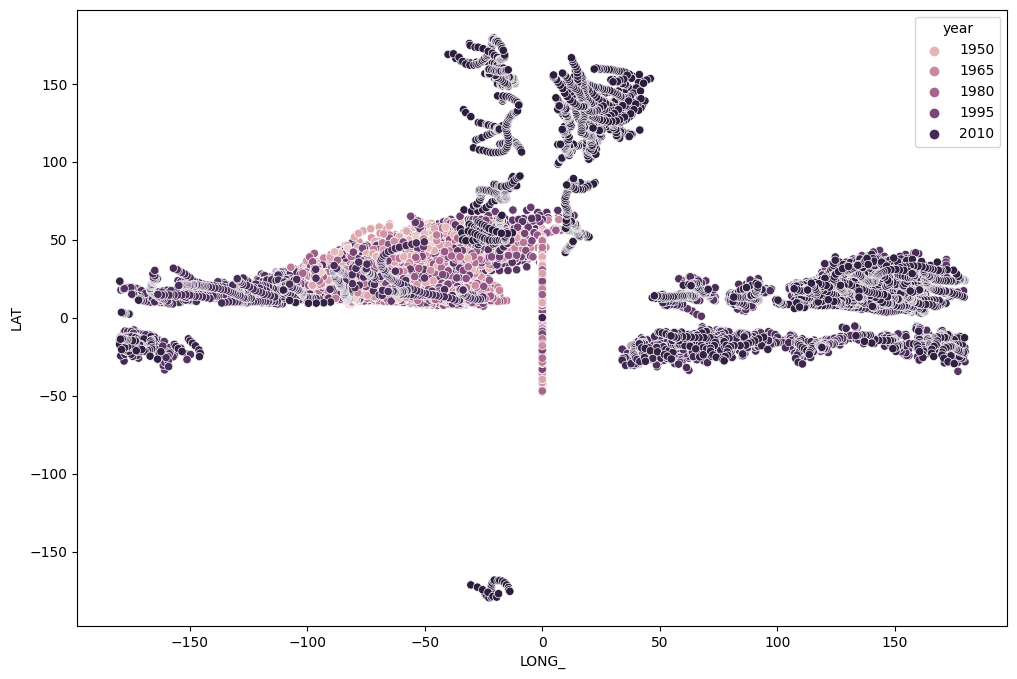

In [5]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 8))
from seaborn import scatterplot
scatterplot(ax=ax, data=df, hue='year', x='LONG_', y='LAT', )

That belt at the x=0 looks wrong so we should probably filter out zero longitude values.

In [6]:
from plotly.express import scatter_geo
scatter_geo(data_frame = df[(df['LONG_'] != 0) ].sample(n=10000), lat='LAT', lon='LONG_', color='year', hover_name='NAME')

For performance reasons we are taking a random sample, so the data looks a bit different.

In [7]:
scatter_geo(data_frame = df[(df['LONG_'] != 0) & (df['year'] == 1990) ], lat='LAT', lon='LONG_', color='STORM_NO', hover_name='NAME')

If we pick a year we can see the progress of individual storms. Here we see the named storms from the 1990 season.

In [8]:
from plotly.express import histogram
histogram(data_frame=df, x='year', nbins=(1 + 2018 - 1940), color='REGION')

Breaking out the data this way, first by year and then by region, shows we may have some data quality issues prior to 1945 and post 2005.

In [9]:
histogram(data_frame=df, x='year', nbins=(1 + 2018 - 1940), color='TYPE')